# Generates a stable surface mask from a glacier outline

In [1]:
from osgeo import gdal
import rasterio as rio
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
# set output file name and path (ssm.tif)
out_fn = '/Users/jukesliu/Documents/PLANETSCOPE_VELOCITIES/LO/ssm.tif'
# out_fn = '/Volumes/LaCie/VG/VG_autorift_inputs/ssm.tif'

## Option 1. If GDAL command line functionality installed:

In [3]:
# open shapefile to use as ssm (glacier outline perhaps)
shp_path = '/Users/jukesliu/Documents/PLANETSCOPE_VELOCITIES/LO/ssm_polygon.shp'
source_ds = gdal.OpenEx(shp_path)

# set pixel resolution and no data value
res = 5 # meters
NoData_value = 0

In [4]:
# rasterize
rcmd = 'gdal_rasterize -tr '+str(res)+' '+str(res)+' -burn 1 -init 0 '+shp_path+' '+out_fn[:-4]+'_uncropped.tif'
print(rcmd)
os.system(rcmd)

gdal_rasterize -tr 5 5 -burn 1 -init 0 /Users/jukesliu/Documents/PLANETSCOPE_VELOCITIES/LO/ssm_polygon.shp /Users/jukesliu/Documents/PLANETSCOPE_VELOCITIES/LO/ssm_uncropped.tif


dyld: Library not loaded: /usr/local/opt/libtiff/lib/libtiff.5.dylib
  Referenced from: /usr/local/opt/libgeotiff/lib/libgeotiff.5.dylib
  Reason: image not found


6

Then run the following printed command on terminal to crop:

In [6]:
# crop to the Box extent
crop_extent_shp = '/Users/jukesliu/Documents/PLANETSCOPE_VELOCITIES/AV/AV_Box_WGS_UTM_33.shp'
# os.system('gdalwarp -cutline '+crop_extent_shp+' -crop_to_cutline '+out_fn+' '+out_fn[:-4]+'_clipped.tif')
os.system('gdalwarp -cutline '+crop_extent_shp+' -crop_to_cutline '+out_fn[:-4]+'_uncropped.tif'+' '+out_fn)
# print('gdalwarp -cutline '+crop_extent_shp+' -crop_to_cutline '+out_fn[:-4]+'_uncropped.tif'+' '+out_fn)

Creating output file that is 4411P x 2562L.
Processing /Users/jukesliu/Documents/PLANETSCOPE_VELOCITIES/AV/ssm_uncropped.tif [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.


0

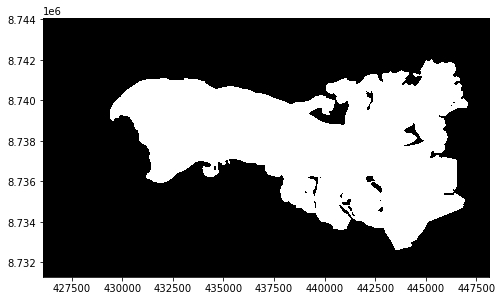

In [7]:
# read and plot to check
src = rio.open(out_fn)
fig, ax = plt.subplots(1, figsize=(8,8))
im1 = show((src, 1), cmap='Greys_r', interpolation='none', ax=ax)
plt.show()

## Option 2. Use gdal.rasterize (broken)

In [7]:
# from rasterio import features
# import geopandas as gpd

In [57]:
# # read in a reference raster to use as the CRS and extent
# ref_reader = rio.open('/Users/jukesliu/Documents/TURNER/DATA/ICE_THICKNESS/Variegated/Nolan_ASTER_20070903_clipped.tif')
# ref_reader

In [58]:
# ref_reader.meta

In [59]:
# # read in glacier outline shapefile with geopandas
# shp_path = '/Users/jukesliu/Documents/TURNER/DATA/shapefiles_gis/VG/Variegated_polygon_UTM07.shp'
# shp = gpd.read_file(shp_path)
# shp

In [16]:
# # generate raster metadata file
# out_meta = ref_reader.meta

In [17]:
# # write out to filename
# out_fn = '/Volumes/LaCie/VG/VG_autorift_inputs/ssm.tif'
# with rio.open(out_fn, 'w+', **out_meta) as out:
#     out_arr = out.read(1)

#     # this is where we create a generator of geom, value pairs to use in rasterizing
#     shapes = ((geom,value) for geom, value in zip(shp.geometry, [1]))

#     burned = features.rasterize(shapes=shapes, fill=0, out=out_arr, transform=out.transform)
#     out.write_band(1, burned)
# print('Rasterization complete.')